# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow.compat.v1 as tf
from tensorflow.keras.layers import *
from sklearn.model_selection import train_test_split

In [2]:
test_df = pd.read_csv("dataset/fashion-mnist_test.csv")
train_df = pd.read_csv("dataset/fashion-mnist_train.csv")

In [3]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_df = np.array(train_df, dtype = "float32")
test_df = np.array(train_df, dtype = "float32")

In [6]:
X_train = train_df[:,1:]/255
Y_train = train_df[:,0]
X_test = test_df[:,1:]/255
Y_test = test_df[:,0]

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_validate, Y_train, Y_validate = train_test_split(X_train, Y_train, test_size = 0.1, random_state = 0)

In [8]:
X_train.shape

(54000, 784)

In [9]:
input_shape = [None, 28,28,1]
no_of_classes = 10

X_train = X_train.reshape(X_train.shape[0], input_shape[1], input_shape[2], input_shape[3])
X_test = X_test.reshape(X_test.shape[0], input_shape[1], input_shape[2], input_shape[3])
X_validate = X_validate.reshape(X_validate.shape[0], input_shape[1], input_shape[2], input_shape[3])

In [10]:
X_train.shape

(54000, 28, 28, 1)

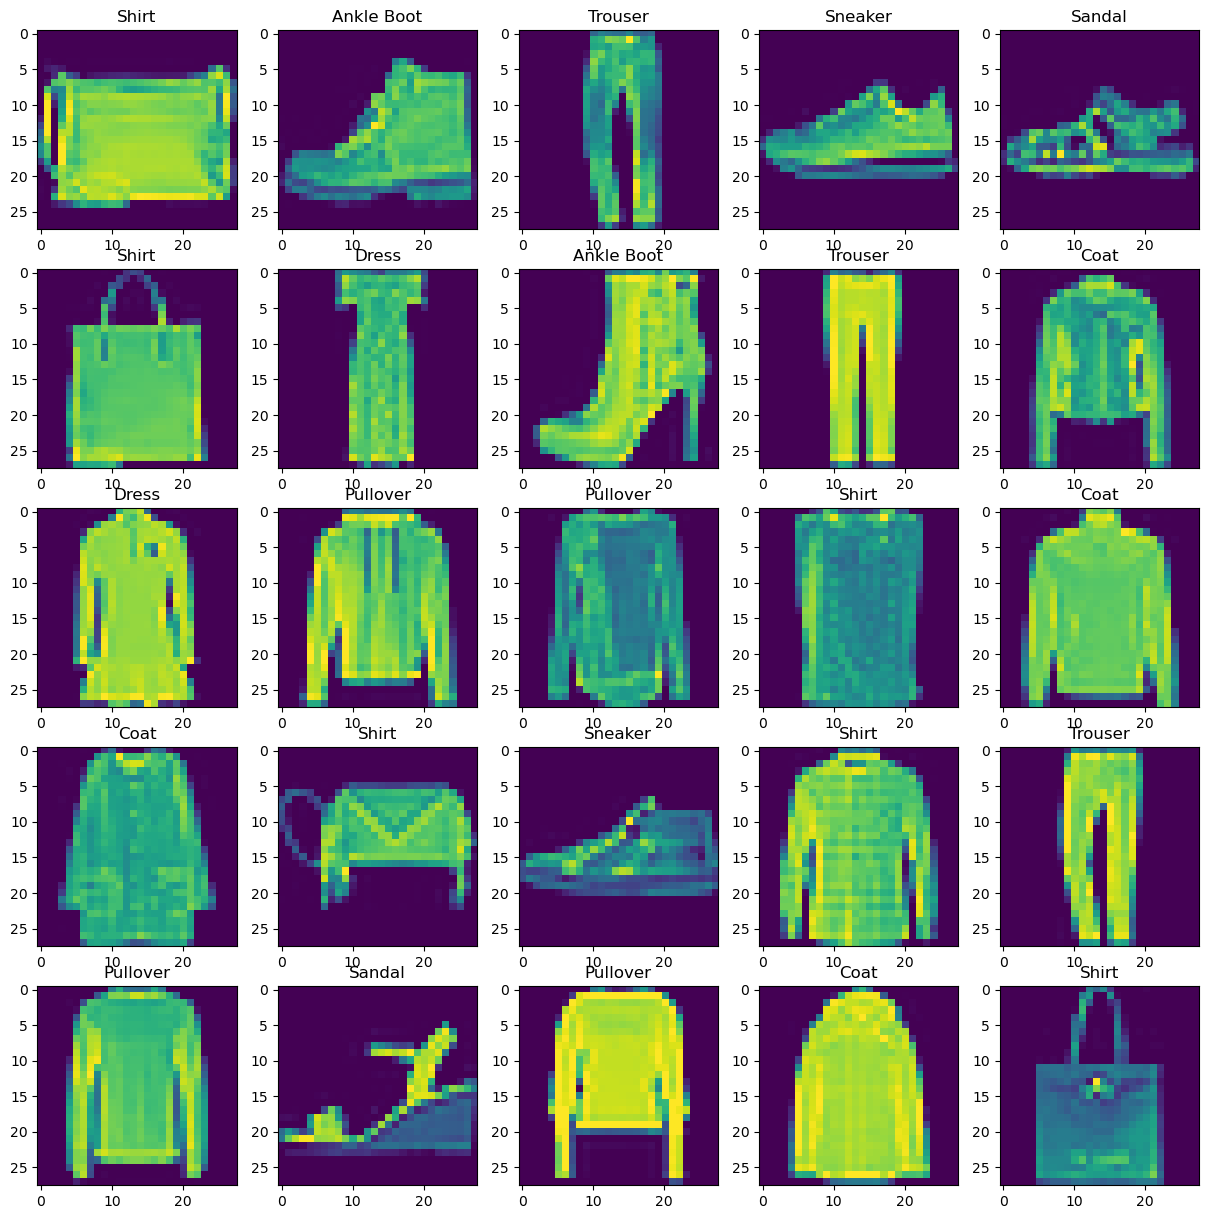

In [11]:
labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Shirt", "Ankle Boot"]
plt.figure(figsize = (15,15))
for i in range (25):
    plt.subplot(5,5,i+1)
    image = X_train[i].reshape(28,28)
    plt.title(labels[int(Y_train[i])])
    plt.imshow(image)
plt.show()

# Le-Net 5 Architecture

The Le-Net 5 architecture is made up of 7 layers.

1) Input Layer : Dimensions of input layer are 28x28x1

2) Convolution Layer : 6 fiters of size 5x5 with tanh activation function and "same" padding

3) Pooling Layer : AveragePooling with kernel size 5x5 and stride 2

4) Convolution Layer : 16 filters of size 5x5 and tanh activation function and "valid" padding

5) Pooling Layer : Average Pooling with kernel size 2x2 and stride 2

6) Flatten : converts the convolution matrix into a fully connected layer

7) Dense : 120 units with "sigmoid" activation

8) Dense : 84 units with "sigmoid" activation

9) Dense : 10 units with "Softmax" activation

In [12]:


cnn_model = tf.keras.models.Sequential()

cnn_model.add(tf.keras.Input((28,28,1)))

cnn_model.add(Conv2D(filters = 6,
                    kernel_size = (5,5),
                    padding = "same",
                    activation = "tanh"))

cnn_model.add(AveragePooling2D(pool_size = (2,2),
                       strides = (2,2)))

cnn_model.add(Conv2D(filters = 16,
                    kernel_size = (5,5),
                    padding = "valid",
                    activation = "tanh"))

cnn_model.add(AveragePooling2D(pool_size = 2,
                       strides = 2))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 120,
                   activation = "sigmoid"))

cnn_model.add(Dense(units = 84, activation = "sigmoid"))

cnn_model.add(Dense(units = 10, 
                    activation = "softmax"))

In [13]:
cnn_model.compile(optimizer = "adam" , loss = "sparse_categorical_crossentropy" , metrics = ["accuracy"])
Y_pred = cnn_model.fit(X_train, Y_train, batch_size = 32, epochs = 20, validation_data = (X_validate, Y_validate))

Epoch 1/20
1688/1688 [==============================] - 18s 10ms/step - loss: 0.6687 - accuracy: 0.7635 - val_loss: 0.4490 - val_accuracy: 0.8417
Epoch 2/20
1688/1688 [==============================] - 17s 10ms/step - loss: 0.4175 - accuracy: 0.8465 - val_loss: 0.3922 - val_accuracy: 0.8603
Epoch 3/20
1688/1688 [==============================] - 19s 11ms/step - loss: 0.3645 - accuracy: 0.8664 - val_loss: 0.3528 - val_accuracy: 0.8757
Epoch 4/20
1688/1688 [==============================] - 20s 12ms/step - loss: 0.3328 - accuracy: 0.8778 - val_loss: 0.3273 - val_accuracy: 0.8832
Epoch 5/20
1688/1688 [==============================] - 21s 13ms/step - loss: 0.3102 - accuracy: 0.8854 - val_loss: 0.3195 - val_accuracy: 0.8830
Epoch 6/20
1688/1688 [==============================] - 20s 12ms/step - loss: 0.2931 - accuracy: 0.8909 - val_loss: 0.3011 - val_accuracy: 0.8903
Epoch 7/20
1688/1688 [==============================] - 19s 12ms/step - loss: 0.2784 - accuracy: 0.8967 - val_loss: 0.2964 -

In [14]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

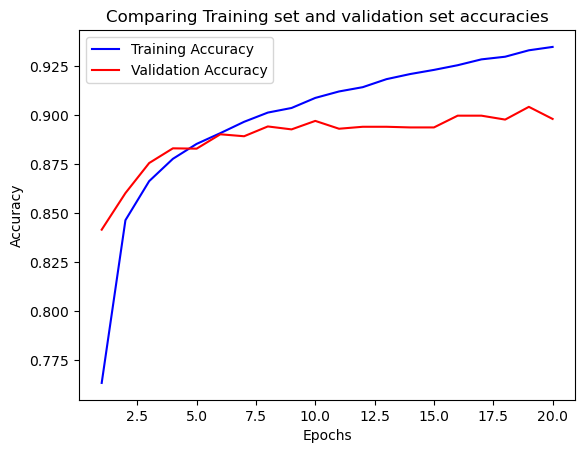

In [15]:
ta = Y_pred.history["accuracy"]
va = Y_pred.history["val_accuracy"]
epochs = range(1,21)

plt.plot(epochs, ta, "blue", label = "Training Accuracy")
plt.plot(epochs, va, "red", label = "Validation Accuracy")
plt.title("Comparing Training set and validation set accuracies")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

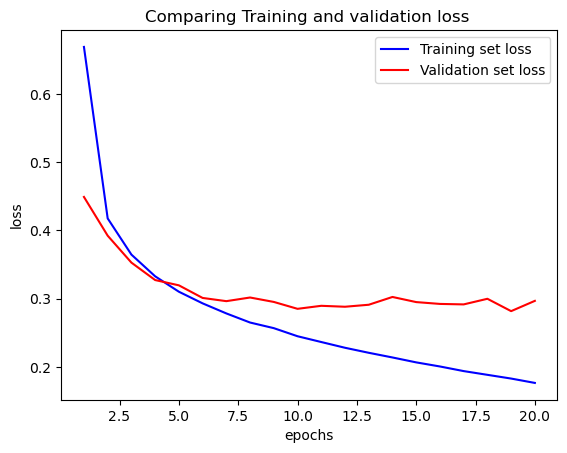

In [16]:
tl = Y_pred.history["loss"]
vl = Y_pred.history["val_loss"]
epochs = range(1,21)

plt.plot(epochs, tl, "blue", label = "Training set loss")
plt.plot(epochs, vl, "red", label = "Validation set loss")
plt.title("Comparing Training and validation loss ")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

In [17]:
print(str.format('Accuracy on Test Set: {:.2f}%', cnn_model.evaluate(X_test, Y_test)[1]*100))

1875/1875 [==============================] - 25s 13ms/step - loss: 0.1794 - accuracy: 0.9353
Accuracy on Test Set: 93.53%


In [18]:
pred = np.argmax(cnn_model.predict(X_test),axis = 1)

1875/1875 [==============================] - 22s 12ms/step


In [19]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90      6000
         1.0       1.00      0.99      0.99      6000
         2.0       0.88      0.91      0.90      6000
         3.0       0.92      0.96      0.94      6000
         4.0       0.92      0.79      0.85      6000
         5.0       0.99      0.99      0.99      6000
         6.0       0.82      0.82      0.82      6000
         7.0       0.97      0.99      0.98      6000
         8.0       0.99      1.00      0.99      6000
         9.0       0.99      0.97      0.98      6000

    accuracy                           0.94     60000
   macro avg       0.94      0.94      0.93     60000
weighted avg       0.94      0.94      0.93     60000



<AxesSubplot:>

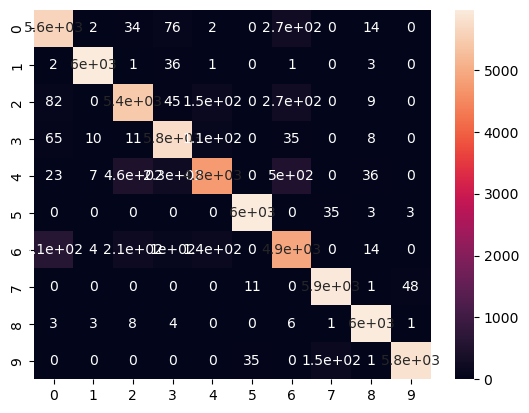

In [20]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(Y_test,pred), annot = True)